In [3]:
import ds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.colors import ListedColormap
import math

ModuleNotFoundError: No module named 'ds'

In [ ]:
#prepare data
da = pd.read_csv("train.csv")
da.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
da.shape

(8693, 14)

DATA ChECK AND PREPARATION

In [ ]:
def check_str(column):
    summary = [0 for i in range (len(da[column]))]
    for i in range(len(da[column])):
        if isinstance(da[column][i],float):
            summary[i] += 1
    total = np.where(pd.Series(summary) > 0,1,0)
    print("in "+column + " total errors: "+ str(np.count_nonzero(total)))
    return total

In [ ]:
import math

def check_float(column):
    summary = [0 for i in range (len(da[column]))]
    for i in range(len(da[column])):
        if math.isnan(da[column][i]):
            summary[i] += 1
    total = pd.Series(np.where(pd.Series(summary) > 0,1,0))
    print("in "+column + " total errors: "+ str(np.count_nonzero(total)))
    return total

In [ ]:
col_str = ['PassengerId','VIP','Transported','HomePlanet', 'CryoSleep', 'Cabin', 'Destination','Name']
col_float = ['RoomService', 'FoodCourt', 'Age','ShoppingMall', 'Spa', 'VRDeck']

total = pd.Series([0 for i in range (len(da["Age"]))])
for col in col_str:
    total += check_str(col)
for col in col_float:
    total += check_float(col)

np.count_nonzero(total)

in PassengerId total errors: 0
in VIP total errors: 203
in Transported total errors: 0
in HomePlanet total errors: 201
in CryoSleep total errors: 217
in Cabin total errors: 199
in Destination total errors: 182
in Name total errors: 200
in RoomService total errors: 181
in FoodCourt total errors: 183
in Age total errors: 179
in ShoppingMall total errors: 208
in Spa total errors: 183
in VRDeck total errors: 188


2087

In [ ]:
def conv(x):
    if(isinstance(x,float)):
        return -1.0
    elif x:
        return 1.0
    else:
        return 0.0

da["VIP"] = pd.Series([conv(vip) for vip in da["VIP"]])
da["CryoSleep"] = pd.Series([conv(sleep) for sleep in da["CryoSleep"]])


In [ ]:
def conv_str(x):
    if(isinstance(x,float)):
        return '-'
    else:
        return x

da["HomePlanet"] = pd.Series([conv_str(homeplanet) for homeplanet in da["HomePlanet"]])
da["Destination"] = pd.Series([conv_str(destination) for destination in da["Destination"]])


In [ ]:
def conv_float(x):
    if(math.isnan(x)):
        return -1.0
    else:
        return x

for float_column in col_float:
    da[float_column] = pd.Series([conv_float(x) for x in da[float_column]])

In [ ]:
def func(txt):
    if isinstance(txt,float):
        return ['-','-']
    else:
        return txt.split(" ")
name_surname = [func(txt) for txt in da["Name"]]
for i in range(len(name_surname)):
    if len(name_surname[i]) !=2:
        print(name_surname[i])
da["First name"] = pd.DataFrame(name_surname)[0]
da["Last name"] = pd.DataFrame(name_surname)[1]

In [ ]:
#Lets split Cabin description into separate parts: deck/num/side
#split
def cabin_split(txt):
    if isinstance(txt,float):
        return ['-','-1','-']
    else:
        return txt.split("/")
cabin_array = pd.DataFrame([cabin_split(cabin) for cabin in da["Cabin"]])

Deck = {'A':1.0, 'B':2.0, 'C':3.0, 'D':4.0, 'E':5.0, 'F':6.0, 'G':7.0, 'T':8.0, '-':-1.0}
Side = {'P':1.0, 'S':2.0, '-': -1.0}
cabin_array[0] = pd.Series([Deck[x] for x in cabin_array[0]])
da["Deck"] = cabin_array[0]
cabin_array[1] = pd.Series([float(x) for x in cabin_array[1]])
da["Num"] = cabin_array[1]
cabin_array[2] = pd.Series([Side[x] for x in cabin_array[2]])
da["Side"] = cabin_array[2]

In [ ]:
pas_id = pd.DataFrame([txt.split("_") for txt in da["PassengerId"]])
for i in range(len(pas_id.iloc[:,0])):
    pas_id.iloc[i,0] = float(pas_id.iloc[i,0])
for i in range(len(pas_id.iloc[:,1])):
    pas_id.iloc[i,1] = float(pas_id.iloc[i,1])

da["id1"] = pas_id[0]
da["id2"] = pas_id[1]

In [ ]:
da["Transported"] = np.where(da["Transported"]==True, 1.0, -1.0)

In [ ]:
da.drop("Name", axis = 1, inplace = True)
da.drop("Cabin", axis = 1, inplace = True)
da.drop("PassengerId", axis = 1, inplace = True)
print(da.shape)
da.head()

(8693, 18)


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,First name,Last name,Deck,Num,Side,id1,id2
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,Maham,Ofracculy,2.0,0.0,1.0,1,1
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,Juanna,Vines,6.0,0.0,2.0,2,1
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,-1.0,Altark,Susent,1.0,0.0,2.0,3,1
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,-1.0,Solam,Susent,1.0,0.0,2.0,3,2
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,Willy,Santantines,6.0,1.0,2.0,4,1


In [ ]:
col_str = ['Transported','HomePlanet', 'Destination','First name','Last name']
col_float = ['Deck','Num','Side','CryoSleep','VIP', 'Age','RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck','id1','id2']

total = pd.Series([0 for i in range (len(da["Age"]))])
for col in col_str:
    total += check_str(col)
for col in col_float:
    total += check_float(col)

total.sum()

in Transported total errors: 8693
in HomePlanet total errors: 0
in Destination total errors: 0
in First name total errors: 0
in Last name total errors: 0
in Deck total errors: 0
in Num total errors: 0
in Side total errors: 0
in CryoSleep total errors: 0
in VIP total errors: 0
in Age total errors: 0
in RoomService total errors: 0
in FoodCourt total errors: 0
in ShoppingMall total errors: 0
in Spa total errors: 0
in VRDeck total errors: 0
in id1 total errors: 0
in id2 total errors: 0


8693

In [ ]:
def new_undefined_str_count(dx,column):
    sum_ = [0 for _ in dx.index]
    for i in range(len(dx[column])):
        if dx.loc[dx.index[i],column] == '-':
            sum_[i] += 1
    sum_ = pd.Series(sum_)
    print(column + ": total undefined values: "+str(sum_.sum()))
    return sum_

def new_undefined_float_count(dx,column):
    sum_ = [0 for a in dx.index]
    for i in range(len(dx[column])):
        if dx.loc[dx.index[i],column] == -1.0:
            sum_[i] += 1
    sum_ = pd.Series(sum_)
    print(column + ": total undefined values: "+str(sum_.sum()))
    return sum_

def count_undef(dx):
    sum_ = pd.Series([0 for _ in dx.index])
    
    for i in range(len(dx.columns)):
        if dx.columns[i]=="Transported":
            continue
        if isinstance(dx.iloc[0,i],float):
            sum_+=new_undefined_float_count(dx,dx.columns[i])
        else:
            sum_ +=new_undefined_str_count(dx,dx.columns[i])
    print("Total not fully defined records: " + str((sum_>0).sum()))

NOW LET'S FILL THE MISSING DATA IN THE TABLE

In [ ]:
df = da

Now let's fill some of the missing data in some columns with

In [ ]:
#HomePlanet
surnames = df["Last name"].unique()
len(surnames)

2218

Let's assume one family is represented by one surname , i.e. they are oiginally from one planet

In [ ]:
#checking hypothesis
count = 0
for surname in surnames:
    planets=df[df["Last name"] == surname]["HomePlanet"].unique()
    planets = np.delete(planets,np.where(planets == '-'))
    if len(planets) == 1:
        count +=1
percent = 100*count/len(surnames)
print(f"surnames that are originally from single planet percentage : {percent:.2f}%")


surnames that are originally from single planet percentage : 99.59%


In [ ]:
surname_from_single_planet = dict()
surname_unknown_origin = []
surname_many_planets = []
many_planets_candidates = []

for surname in surnames:
    family = df[df["Last name"] == surname]
    homeplanets = family["HomePlanet"].unique()
    homeplanets = np.delete(homeplanets,np.where(homeplanets == '-'))
    if len(homeplanets) <= 1:
        if len(homeplanets) ==0:
            surname_unknown_origin.append(surname)
        else:
            surname_from_single_planet[surname] = homeplanets[0] #single choice

    else: #many choices
        surname_many_planets.append(surname)
        many_planets_candidates = homeplanets

percent = 100*len(surname_from_single_planet)/len(surnames)
print(f"surnames that are originally from single planet percentage : {percent:.2f}%")
print(f"surnames that unknown origin # : {len(surname_unknown_origin):d}")
print(f"surnames that originally from many planets # : {len(surname_many_planets):d}")

surnames that are originally from single planet percentage : 99.59%
surnames that unknown origin # : 8
surnames that originally from many planets # : 1


In [ ]:
import random # for choosing planets randomly

planets_col = np.array(df["HomePlanet"])
cleaned = np.delete(planets_col,np.where(planets_col == '-'))
planets = np.unique(cleaned)

total_num = len(cleaned)

def planet_prob(planet):
    return np.count_nonzero(cleaned == planet)/total_num

probabilities = [planet_prob(planet) for planet in planets]

planets_prob_dict = {planet: probability for planet, probability in zip(planets,probabilities)}

def get_planet_with_prob(planet_list, random_state = 1):
    probs = pd.Series([planets_prob_dict[planet] for planet in planet_list])
    total = probs.sum()
    probs = [prob/total for prob in probs]
    return random.choices(planet_list, weights=probs, k=1)[0]

In [ ]:
planet_random_state = 2

for i in range(len(df["HomePlanet"])):
    if df["HomePlanet"][i] == '-':
        if df["Last name"][i] in surname_from_single_planet:
            df["HomePlanet"][i] = surname_from_single_planet[df["Last name"][i]]
        elif df["Last name"][i] in surname_unknown_origin: #all planets possible
            df["HomePlanet"][i] = get_planet_with_prob(['Earth','Europa','Mars'],random_state = planet_random_state)
            #print("for surname with unknown origin " + df["Last name"][i]+" set planet "+df["HomePlanet"][i])
        else: #many planets - we randomy choose only between the existing planets excluding the missin ones
            list_ = df[df["Last name"]==df["Last name"][i]]["HomePlanet"].unique()
            list_ = np.delete(list_,np.where(list_== '-'))
            df["HomePlanet"][i]  = get_planet_with_prob(list_,random_state=planet_random_state)
            #print("for surname with many origins (below)" + df["Last name"][i]+" set planet "+df["HomePlanet"][i])

(df[df["HomePlanet"] == '-'])["HomePlanet"].count()

<ipython-input-23-61496d7ae375>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HomePlanet"][i] = get_planet_with_prob(['Earth','Europa','Mars'],random_state = planet_random_state)
<ipython-input-23-61496d7ae375>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HomePlanet"][i] = surname_from_single_planet[df["Last name"][i]]
<ipython-input-23-61496d7ae375>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HomePlanet"][i]  

0

In [ ]:
dt = df[df["CryoSleep"]==1]
expense = dt['RoomService']+dt['FoodCourt']+dt['ShoppingMall']+dt['Spa']+dt['VRDeck']
(expense >0).sum()

0

Bingo!

In [ ]:
df.loc[df["CryoSleep"]==1,'RoomService'] = 0
df.loc[df["CryoSleep"]==1,'FoodCourt'] = 0
df.loc[df["CryoSleep"]==1,'ShoppingMall'] = 0
df.loc[df["CryoSleep"]==1,'Spa'] = 0
df.loc[df["CryoSleep"]==1,'VRDeck'] = 0

if expenses >0 then df.loc[df["CryoSleep"]==-1,'CryoSleep'] = 0

In [ ]:
expense = df['RoomService']+df['FoodCourt']+df['ShoppingMall']+df['Spa']+df['VRDeck']
df.loc[(expense > 0)&(df["CryoSleep"]==-1.0),"CryoSleep"] = 0

In [ ]:
origin_map = {'Earth':0.0, 'Mars':1.0, 'Europa':2.0}
destination_map = {'55 Cancri e':0.0,'TRAPPIST-1e':1.0,'PSO J318.5-22':2.0}

def route_number(origin,destination):
    if (origin == '-') or (destination == '-'): 
        return -1.0
    else: 
        o = origin_map[origin]
        d = destination_map[destination]
        return o*3+d+1 #range(1,10)

df['route'] = pd.Series([route_number(df["HomePlanet"][i],df["Destination"][i]) for i in range(len(df["HomePlanet"]))])
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,First name,Last name,Deck,Num,Side,id1,id2,route
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,Maham,Ofracculy,2.0,0.0,1.0,1,1,8.0
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,Juanna,Vines,6.0,0.0,2.0,2,1,2.0
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,-1.0,Altark,Susent,1.0,0.0,2.0,3,1,8.0
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,-1.0,Solam,Susent,1.0,0.0,2.0,3,2,8.0
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,Willy,Santantines,6.0,1.0,2.0,4,1,2.0


ID2 --> Deck

In [ ]:
dt = df[df["Deck"]!=-1.0]
deck = dt["Deck"].values
id2 = dt["id2"].values
arr = pd.Series(zip(id2,deck))
uniq_deck_id2 = arr.unique()
print("unique pairs #:",len(uniq_deck_id2))

def count_pairs(arr,pair):
    c = 0
    for p in arr:
        c+= p==pair
    return c
c = pd.Series([count_pairs(arr,uni) for uni in uniq_deck_id2])
uniq_deck_id2 = pd.Series(uniq_deck_id2)

unique pairs #: 51


LET'S make probability matrix

In [ ]:
df["id2"].unique()

array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0], dtype=object)

In [ ]:
prob_matrix_deck = pd.DataFrame(index=dt["id2"].unique(),columns = dt["Deck"].unique())
unique_index = pd.Index(list(uniq_deck_id2))

for uni in uniq_deck_id2:
    prob_matrix_deck.loc[uni[0],uni[1]] = c[unique_index.get_loc((uni[0],uni[1]))]

prob_matrix_deck

,2.0,6.0,1.0,7.0,5.0,4.0,3.0,8.0
1.0,438,2202,147,1857,671,331,432,5
2.0,212,368,64,337,128,97,171,NaN
3.0,69,136,30,182,43,22,69,NaN
4.0,37,40,11,70,18,12,37,NaN
5.0,14,23,3,43,12,9,23,NaN
6.0,5,12,1,38,3,4,12,NaN
7.0,4,9,NaN,23,1,3,3,NaN
8.0,NaN,4,NaN,9,NaN,NaN,NaN,NaN


In [ ]:
for i in prob_matrix_deck.index:
    for j in prob_matrix_deck.columns:
        if math.isnan(prob_matrix_deck.loc[i,j]):
            prob_matrix_deck.loc[i,j] = 0

prob_matrix_deck

,2.0,6.0,1.0,7.0,5.0,4.0,3.0,8.0
1.0,438,2202,147,1857,671,331,432,5
2.0,212,368,64,337,128,97,171,0
3.0,69,136,30,182,43,22,69,0
4.0,37,40,11,70,18,12,37,0
5.0,14,23,3,43,12,9,23,0
6.0,5,12,1,38,3,4,12,0
7.0,4,9,0,23,1,3,3,0
8.0,0,4,0,9,0,0,0,0


In [ ]:
#finally lets make it probailities
sum_ = 0.0
for i in prob_matrix_deck.index:
    for j in prob_matrix_deck.columns:
        sum_ += prob_matrix_deck.loc[i,j]

for i in prob_matrix_deck.index:
    sum_ = prob_matrix_deck.loc[i,:].sum()
    for j in prob_matrix_deck.columns:
            prob_matrix_deck.loc[i,j] /= sum_

prob_matrix_deck

,2.0,6.0,1.0,7.0,5.0,4.0,3.0,8.0
1.0,0.0720039,0.361992,0.0241657,0.305277,0.110307,0.0544139,0.0710176,0.000821963
2.0,0.153958,0.267248,0.0464779,0.244735,0.0929557,0.070443,0.124183,0
3.0,0.125227,0.246824,0.0544465,0.330309,0.0780399,0.0399274,0.125227,0
4.0,0.164444,0.177778,0.0488889,0.311111,0.08,0.0533333,0.164444,0
5.0,0.110236,0.181102,0.023622,0.338583,0.0944882,0.0708661,0.181102,0
6.0,0.0666667,0.16,0.0133333,0.506667,0.04,0.0533333,0.16,0
7.0,0.0930233,0.209302,0,0.534884,0.0232558,0.0697674,0.0697674,0
8.0,0,0.307692,0,0.692308,0,0,0,0


In [ ]:
def get_deck_with_prob(id2,random_state_deck = 1):
    probs = np.array(prob_matrix_deck.loc[id2,:])
    return random.choices(prob_matrix_deck.columns, weights=probs, k=1)[0]

In [ ]:
len(df["id1"].unique())

6217

In [ ]:
len(df["Num"].unique())

1818

In [ ]:
def tuple_equal_2d(tuple1,tuple2):
    return (tuple1[0]==tuple2[0]) and (tuple1[1] == tuple2[1])

def unique_tuple(array_of_tuples):
    array_uniques = []
    for i in range(len(array_of_tuples)):
        j = 0
        while j < i:
            if tuple_equal_2d(array_of_tuples[i], array_of_tuples[j]):
                break
            else:
                j +=1
        if j == i:
            array_uniques.append(array_of_tuples[i])
    print(len(array_uniques))
    return array_uniques

In [ ]:
dt = df[df["Num"]!=-1.0]
num = dt["Num"].values
id1 = dt["id1"].values
arr = pd.Series(zip(id1,num))
uniq_num_id1 = pd.Series(arr.unique())
print(len(uniq_num_id1))

single_id1_to_num = []
id1_to_many_num = []
id1_many = []
num_many = []
for pair in uniq_num_id1:
    if len(dt[dt["id1"] == pair[0]]["Num"].unique())== 1:
        single_id1_to_num.append(pair)
    else:
        id1_to_many_num.append(pair)
        id1_many.append(pair[0])
        num_many.append(pair[1])

id1_many = pd.Series(id1_many)
num_many = pd.Series(num_many)

single_id1_to_num_dict = {id1:num for id1,num in single_id1_to_num}

def count_pairs(arr,pair):
    c = 0
    for p in arr:
        c+= p==pair
    return c
c_ = pd.Series([count_pairs(arr,uni) for uni in id1_to_many_num])

print("singles: ",len(single_id1_to_num))
print("#pairs for matrix: ",len(id1_to_many_num))

6559
singles:  5698
#pairs for matrix:  861


In [ ]:
prob_matrix_num = pd.DataFrame(index=list(id1_many.unique()),columns = list(num_many.unique()))
print(prob_matrix_num.shape)
unique_index = pd.Index(list(id1_to_many_num))

for uni in id1_to_many_num:
    prob_matrix_num.loc[uni[0],uni[1]] = c_[unique_index.get_loc((uni[0],uni[1]))]

prob_matrix_num.head()

(420, 680)


,2.0,0.0,6.0,14.0,3.0,10.0,15.0,16.0,20.0,19.0,...,291.0,1871.0,1782.0,1487.0,1496.0,1886.0,1888.0,592.0,1507.0,1894.0
6.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17.0,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64.0,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67.0,NaN,NaN,NaN,NaN,NaN,2,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for i in prob_matrix_num.index:
    for j in prob_matrix_num.columns:
        if math.isnan(prob_matrix_num.loc[i,j]):
            prob_matrix_num.loc[i,j] = 0

prob_matrix_num.head()

,2.0,0.0,6.0,14.0,3.0,10.0,15.0,16.0,20.0,19.0,...,291.0,1871.0,1782.0,1487.0,1496.0,1886.0,1888.0,592.0,1507.0,1894.0
6.0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17.0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64.0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67.0,0,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91.0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in prob_matrix_num.index:
    sum_ = prob_matrix_num.loc[i,:].sum()
    for j in prob_matrix_num.columns:
            prob_matrix_num.loc[i,j] /= sum_

prob_matrix_num.head()

,2.0,0.0,6.0,14.0,3.0,10.0,15.0,16.0,20.0,19.0,...,291.0,1871.0,1782.0,1487.0,1496.0,1886.0,1888.0,592.0,1507.0,1894.0
6.0,0.5,0.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17.0,0,0.5,0.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64.0,0,0,0,0.5,0.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67.0,0,0,0,0,0,0.666667,0.333333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91.0,0,0,0,0,0,0,0,0.5,0.5,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def get_num_with_prob(id1,random_state_num = 1):
    if id1 in list(id1_many.unique()):
        probs = prob_matrix_num.loc[id1,:]
        return random.choices(prob_matrix_num.columns, weights=probs, k=1)[0]
    elif id1 in list(single_id1_to_num_dict.keys()):
        return single_id1_to_num_dict[id1]
    else:
        return -1.0


Now let's map Deck & Num

In [ ]:
random_state_deck = 1
random_state_num = 1

for i in range(len(df["Deck"])):
    if(df["Deck"][i]==-1.0):
        df.loc[i,"Deck"] = get_deck_with_prob(df["id2"][i],random_state_deck)

for i in range(len(df["Num"])):
    if(df["Num"][i]==-1.0):
        df.loc[i,"Num"] = get_num_with_prob(df["id1"][i],random_state_num)

Let's see VIP:

In [ ]:
count = 0
unknown = 0
mix = 0
vip_surnames = []
no_vip_surnames = []
mix_surnames = []

for surname in surnames:
    matrix = df[df["Last name"] == surname]
    t=matrix["VIP"].unique()
    t = np.delete(t,np.where(t == -1))
    if len(t) == 1:
        count +=1
        if(t[0]==1):
            vip_surnames.append(surname)
        else:
            no_vip_surnames.append(surname)
    elif len(t) == 0:
        unknown +=1
    else:
        mix +=1
        mix_surnames.append(surname)

percent = 100*count/len(surnames)
print(f"surnames that VIP/non VIP together : {percent:.2f}%")
percent = 100*unknown/len(surnames)
print(f"surnames that have totally unknown VIP status : {percent:.2f}%")
percent = 100*mix/len(surnames)
print(f"surnames that have mix VIP status : {percent:.2f}%")

surnames that VIP/non VIP together : 92.06%
surnames that have totally unknown VIP status : 0.32%
surnames that have mix VIP status : 7.62%


In [ ]:
pd.crosstab(df["VIP"],df["Deck"])

Deck,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
VIP,,,,,,,,
-1.0,6,14,20,9,16,70,68,0
0.0,218,746,701,449,866,2760,2546,5
1.0,36,42,41,33,15,31,1,0


In [ ]:
for i in range(len(df["VIP"])):
    if df["VIP"][i] == -1:
        if df["Last name"][i] in vip_surnames:
            df["VIP"][i] = 1
        elif df["Last name"][i] in no_vip_surnames:
            df["VIP"][i] = 0
        elif df['Deck'][i] > 5:
            df["VIP"][i] = 0
        else:
            df["VIP"][i] = -1

<ipython-input-45-716ee42ff474>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["VIP"][i] = 0
<ipython-input-45-716ee42ff474>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["VIP"][i] = 0
<ipython-input-45-716ee42ff474>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["VIP"][i] = -1


In [ ]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,First name,Last name,Deck,Num,Side,id1,id2,route
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,Maham,Ofracculy,2.0,0.0,1.0,1,1,8.0
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,Juanna,Vines,6.0,0.0,2.0,2,1,2.0
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,-1.0,Altark,Susent,1.0,0.0,2.0,3,1,8.0
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,-1.0,Solam,Susent,1.0,0.0,2.0,3,2,8.0
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,Willy,Santantines,6.0,1.0,2.0,4,1,2.0


<AxesSubplot:xlabel='route', ylabel='count'>

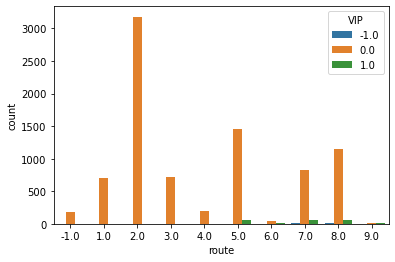

In [ ]:
sb.countplot(x = df["route"], hue = df["VIP"])

#VIP ==1 ==> route in [5,6,7,8,9] 

In [ ]:
pd.crosstab(df["Deck"],df["route"])

route,-1.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Deck,,,,,,,,,,
1.0,4,0,0,0,0,2,0,110,142,2
2.0,18,4,7,2,0,4,0,335,429,3
3.0,12,2,3,1,1,3,0,320,407,13
4.0,11,0,5,1,47,214,17,68,128,0
5.0,23,50,322,32,21,302,13,49,85,0
6.0,68,275,1138,224,128,982,20,11,14,1
7.0,46,370,1706,466,0,11,1,9,6,0
8.0,0,0,0,0,0,0,0,0,5,0


In [ ]:
prob_matrix_deck_to_route_vip_0 = pd.DataFrame(index = range(1,9), columns = range(1,10))
prob_matrix_deck_to_route_vip_1 = pd.DataFrame(index = range(1,8), columns = range(5,10))

for i in range(1,9):
    dt = df[(df["Deck"] ==i)&(df["VIP"] ==0)]
    counts = [len(dt[dt['route']==j]['route']) for j in range(1,10)]
    Sum = sum(counts)
    if Sum >0:
        probs = [counts[k]/Sum for k in range(9)]
        prob_matrix_deck_to_route_vip_0.loc[i,:] = probs
    else:
        prob_matrix_deck_to_route_vip_1.loc[i,:] = 0

for i in range(1,8):
    dt = df[(df["Deck"] ==i)&(df["VIP"] ==1)]
    counts = [len(dt[dt['route']==j]['route']) for j in range(5,10)]
    Sum = sum(counts)
    if Sum >0:
        probs = [counts[k]/Sum for k in range(5)]
        prob_matrix_deck_to_route_vip_1.loc[i,:] = probs
    else:
        prob_matrix_deck_to_route_vip_1.loc[i,:] = 0



In [ ]:
prob_matrix_deck_to_route_vip_0

,1,2,3,4,5,6,7,8,9
1,0,0,0,0,0.00917431,0,0.426606,0.559633,0.00458716
2,0.00540541,0.00945946,0.0027027,0,0.00540541,0,0.417568,0.558108,0.00135135
3,0.00283286,0.00424929,0.00141643,0.00141643,0.00424929,0,0.427762,0.548159,0.00991501
4,0,0.0112108,0.00224215,0.105381,0.432735,0.0313901,0.139013,0.278027,0
5,0.0583431,0.375729,0.0373396,0.0245041,0.33839,0.0128355,0.0548425,0.0980163,0
6,0.0995655,0.41202,0.0811007,0.0463432,0.346488,0.0057929,0.00362056,0.00506879,0
7,0.144081,0.66433,0.181464,0,0.00389408,0.000389408,0.00350467,0.00233645,0
8,0,0,0,0,0,0,0,1,0


In [ ]:
prob_matrix_deck_to_route_vip_1

,5,6,7,8,9
1,0,0,0.472222,0.5,0.0277778
2,0,0,0.585366,0.365854,0.0487805
3,0,0,0.4,0.45,0.15
4,0.606061,0.0909091,0.181818,0.121212,0
5,0.8,0.0666667,0.0666667,0.0666667,0
6,0.806452,0.129032,0.0322581,0,0.0322581
7,1,0,0,0,0


In [ ]:
def get_route_with_prob(vip,deck,random_state_deck = 1):
    if vip ==-1.0 or deck == -1.0:
        return -1.0
    if vip:
        if deck == 8.0:
            return -1.0
        probs = np.array(prob_matrix_deck_to_route_vip_1.loc[deck,:])
        return random.choices(prob_matrix_deck_to_route_vip_1.columns, weights=probs, k=1)[0]
    else:
        probs = np.array(prob_matrix_deck_to_route_vip_0.loc[deck,:])
        return random.choices(prob_matrix_deck_to_route_vip_0.columns, weights=probs, k=1)[0]

In [ ]:
dtmp = df
dtmp.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,First name,Last name,Deck,Num,Side,id1,id2,route
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,Maham,Ofracculy,2.0,0.0,1.0,1,1,8.0
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,Juanna,Vines,6.0,0.0,2.0,2,1,2.0
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,-1.0,Altark,Susent,1.0,0.0,2.0,3,1,8.0
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,-1.0,Solam,Susent,1.0,0.0,2.0,3,2,8.0
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,Willy,Santantines,6.0,1.0,2.0,4,1,2.0


In [ ]:
for i in range(len(dtmp["route"])):
    if dtmp["route"][i] == -1.0:
        route_predicted = get_route_with_prob(dtmp["VIP"][i],dtmp["Deck"][i])
        dtmp.loc[i,"route"] = route_predicted
dtmp.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,First name,Last name,Deck,Num,Side,id1,id2,route
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,Maham,Ofracculy,2.0,0.0,1.0,1,1,8.0
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,Juanna,Vines,6.0,0.0,2.0,2,1,2.0
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,-1.0,Altark,Susent,1.0,0.0,2.0,3,1,8.0
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,-1.0,Solam,Susent,1.0,0.0,2.0,3,2,8.0
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,Willy,Santantines,6.0,1.0,2.0,4,1,2.0


In [ ]:
count_undef(dtmp)

HomePlanet: total undefined values: 0
CryoSleep: total undefined values: 98
Destination: total undefined values: 182
Age: total undefined values: 179
VIP: total undefined values: 12
RoomService: total undefined values: 113
FoodCourt: total undefined values: 113
ShoppingMall: total undefined values: 112
Spa: total undefined values: 118
VRDeck: total undefined values: 126
First name: total undefined values: 200
Last name: total undefined values: 200
Deck: total undefined values: 0
Num: total undefined values: 99
Side: total undefined values: 199
id1: total undefined values: 0
id2: total undefined values: 0
route: total undefined values: 0
Total not fully defined records: 1357


In [ ]:
dtmp.drop(["HomePlanet","Destination","First name","Last name","id1","id2"], axis = 1, inplace = True)
dtmp.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,route
0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,2.0,0.0,1.0,8.0
1,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,6.0,0.0,2.0,2.0
2,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,-1.0,1.0,0.0,2.0,8.0
3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,-1.0,1.0,0.0,2.0,8.0
4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,6.0,1.0,2.0,2.0


In [ ]:
count_undef(dtmp)

CryoSleep: total undefined values: 98
Age: total undefined values: 179
VIP: total undefined values: 12
RoomService: total undefined values: 113
FoodCourt: total undefined values: 113
ShoppingMall: total undefined values: 112
Spa: total undefined values: 118
VRDeck: total undefined values: 126
Deck: total undefined values: 0
Num: total undefined values: 99
Side: total undefined values: 199
route: total undefined values: 0
Total not fully defined records: 1019


In [ ]:
dtmp.shape

(8693, 13)

In [ ]:
dtmp.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,route
0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,2.0,0.0,1.0,8.0
1,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,6.0,0.0,2.0,2.0
2,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,-1.0,1.0,0.0,2.0,8.0
3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,-1.0,1.0,0.0,2.0,8.0
4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,6.0,1.0,2.0,2.0


In [ ]:
d_clean = dtmp[(dtmp['CryoSleep']>=0)&(dtmp['Age']>=0)&(dtmp['VIP']>=0)&(dtmp['RoomService']>=0)&(dtmp['FoodCourt']>=0)&(dtmp['ShoppingMall']>=0)&(dtmp['Spa']>=0)&(dtmp['VRDeck']>=0)&(dtmp['Deck']>=0)&(dtmp['Num']>=0)&(dtmp['Side']>=0)&(dtmp['route']>=0)]
d_clean.shape

(7674, 13)

In [ ]:
pd.value_counts(d_clean['Transported'])

 1.0    3943
-1.0    3731
Name: Transported, dtype: int64

In [ ]:
count_undef(d_clean)

CryoSleep: total undefined values: 0
Age: total undefined values: 0
VIP: total undefined values: 0
RoomService: total undefined values: 0
FoodCourt: total undefined values: 0
ShoppingMall: total undefined values: 0
Spa: total undefined values: 0
VRDeck: total undefined values: 0
Deck: total undefined values: 0
Num: total undefined values: 0
Side: total undefined values: 0
route: total undefined values: 0
Total not fully defined records: 0


In [ ]:
d_clean.to_csv('Cleaned_DF.csv')

<------------------------------------------------------------------------------------------------------------>

<---------------------------------------------Here we start training model------------------------------------>

<------------------------------------------------------------------------------------------------------------>

In [ ]:
import ds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.colors import ListedColormap
import math

d_clean = pd.read_csv("Cleaned_DF.csv")

In [ ]:
features = ['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Deck','Num','Side','route']

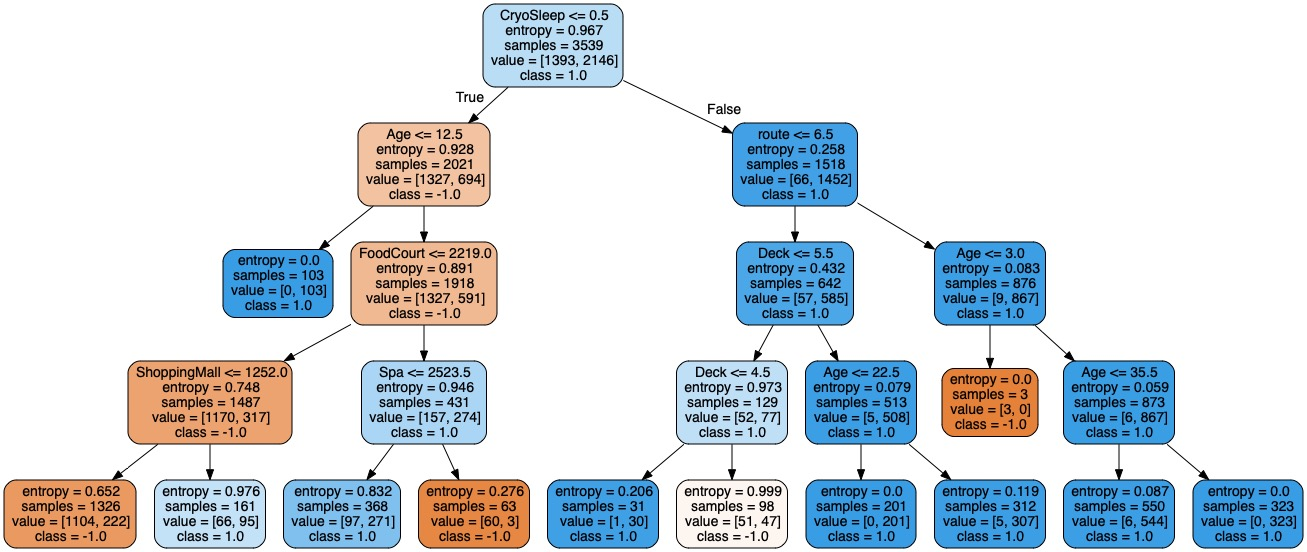

test size:  3539 , total errors in test: 12.63%
index = predicted, columns = factual, in %:
         -1        1
-1  34.4165  7.68579
 1   4.9449  52.9528


In [ ]:
data_exploration_tree = ds.divide_frame(dataf = d_clean[d_clean['route']>3.5],columns = features,teacher_column = "Transported",classifier = 'Tree', criterion_tree = "entropy", depth = 4, random_state_sample = 5,random_state_ppn = 2, fraction = 1)

3.5 < route
1519 CryoSleep == 1 ==> 1.0 [66,1453]

In [ ]:
mask1 = (d_clean['CryoSleep'] == 1)&(d_clean['route']>3.5)# ==> 1.0

In [ ]:
df_impure = d_clean[~mask1]
df_impure.shape

(6156, 14)

From here we try to find other reelations in impure frame

In [ ]:
def sigmoid(x): 
    return 1/(1+math.exp(-x))

In [ ]:
def z(ppn,x1,x2):
    return ppn.w_[0]+ ppn.w_[1]*x1 + ppn.w_[2]*x2

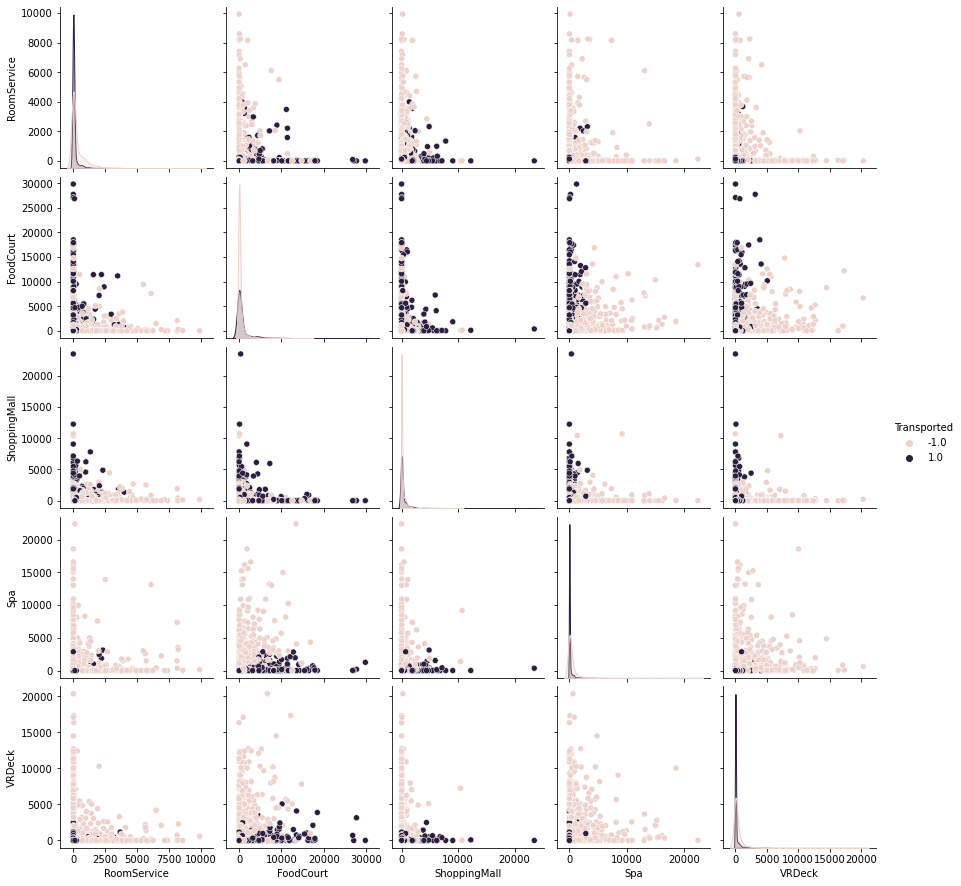

In [ ]:
features = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Transported']
d1 = df_impure[features]

sb.pairplot(d1,hue = "Transported")

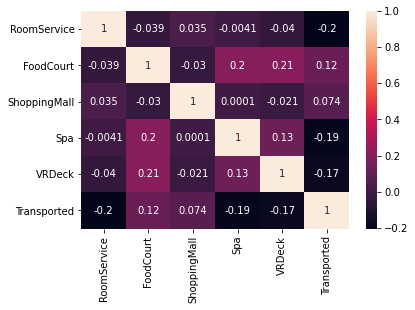

In [ ]:
corrMatrix = d1.corr()

sb.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
col_s = ['FoodCourt','Spa']
dz = d1[col_s+["Transported"]]

x1_mean = dz[col_s[0]].mean()
x1_sigma = dz[col_s[0]].std()

x2_mean = dz[col_s[1]].mean()
x2_sigma = dz[col_s[1]].std()

for i in dz.index:
    dz.loc[i,col_s[0]] = (dz.loc[i,col_s[0]] - x1_mean)/x1_sigma
    dz.loc[i,col_s[1]] = (dz.loc[i,col_s[1]] - x2_mean)/x2_sigma

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-13-353c777edf2c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dz.loc[i,col_s[0]] = (dz.loc[i,col_s[0]] - x1_mean)/x1_sigma
<ipython-input-13-353c777edf2c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dz.loc[i,col_s[1]] = (dz.loc[i,col_s[1]]

test size:  1847 , total errors in test: 36.60%
index = predicted, columns = factual, in %:
         -1        1
-1  57.0114  33.5138
 1  3.08609  6.38874
     w =  [-0.00211372  0.00317522 -0.00385777]


/Users/sergey/Dropbox/GitHub/spaceship/spaceship/ds.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr[i] = 0


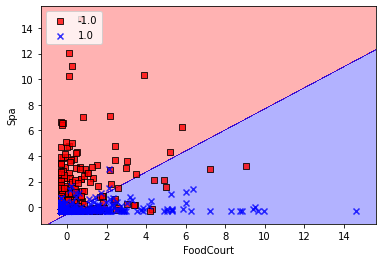

In [ ]:
ppn = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = 'Perceptron', random_state_sample = 4,random_state_ppn = 3, fraction = 0.7, eta = 0.001, iter = 30,plot = True, res =0.01)

test size:  1847 , total errors in test: 36.06%
index = predicted, columns = factual, in %:
         -1        1
-1  58.7981  34.4342
 1  1.62426  5.14348


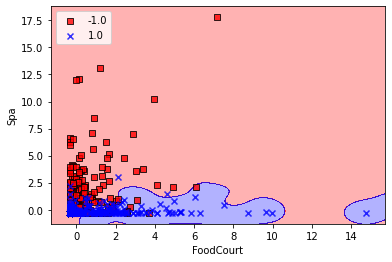

In [ ]:
ppn = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = 'SVC', kernel_ = 'rbf', gamma_ = 1, c=1, degree_ = 3, random_state_sample = 1,random_state_ppn = 1, fraction = 0.7, eta = 0.0001, iter = 300,plot = True, res =0.01)

test size:  481 , total errors in test: 30.15%
index = predicted, columns = factual, in %:
         -1        1
-1  68.3992  30.1455
 1        0   1.4553


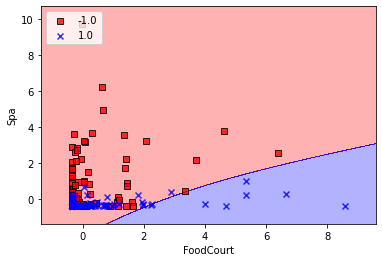

In [ ]:
ppn = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = 'SVC', kernel_ = 'poly', gamma_ = 1, c=1, degree_ = 3, random_state_sample = 1,random_state_ppn = 1, fraction = 0.9,plot = True, res =0.01)

test size:  1442 , total errors in test: 30.93%
index = predicted, columns = factual, in %:
         -1        1
-1  64.2164  29.0569
 1   1.8724  4.85437


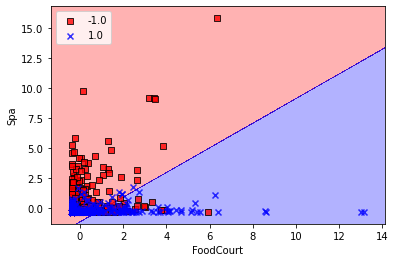

In [ ]:
ppn = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = 'SVC', kernel_ = 'linear', gamma_ = 1, c=2, random_state_sample = 2,random_state_ppn = 3, fraction = 0.7,plot = True, res =0.01)

test size:  481 , total errors in test: 29.52%
index = predicted, columns = factual, in %:
         -1        1
-1  63.8254   24.948
 1   4.5738  6.65281


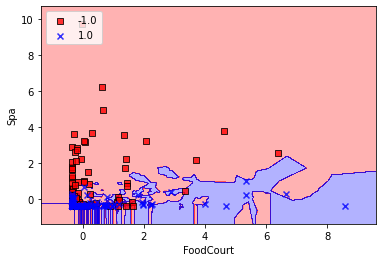

In [ ]:
ppn = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = 'KNN', dimension = 2, neighbors =2, random_state_sample = 1,random_state_ppn = 1, fraction = 0.9, plot = True, res =0.01)

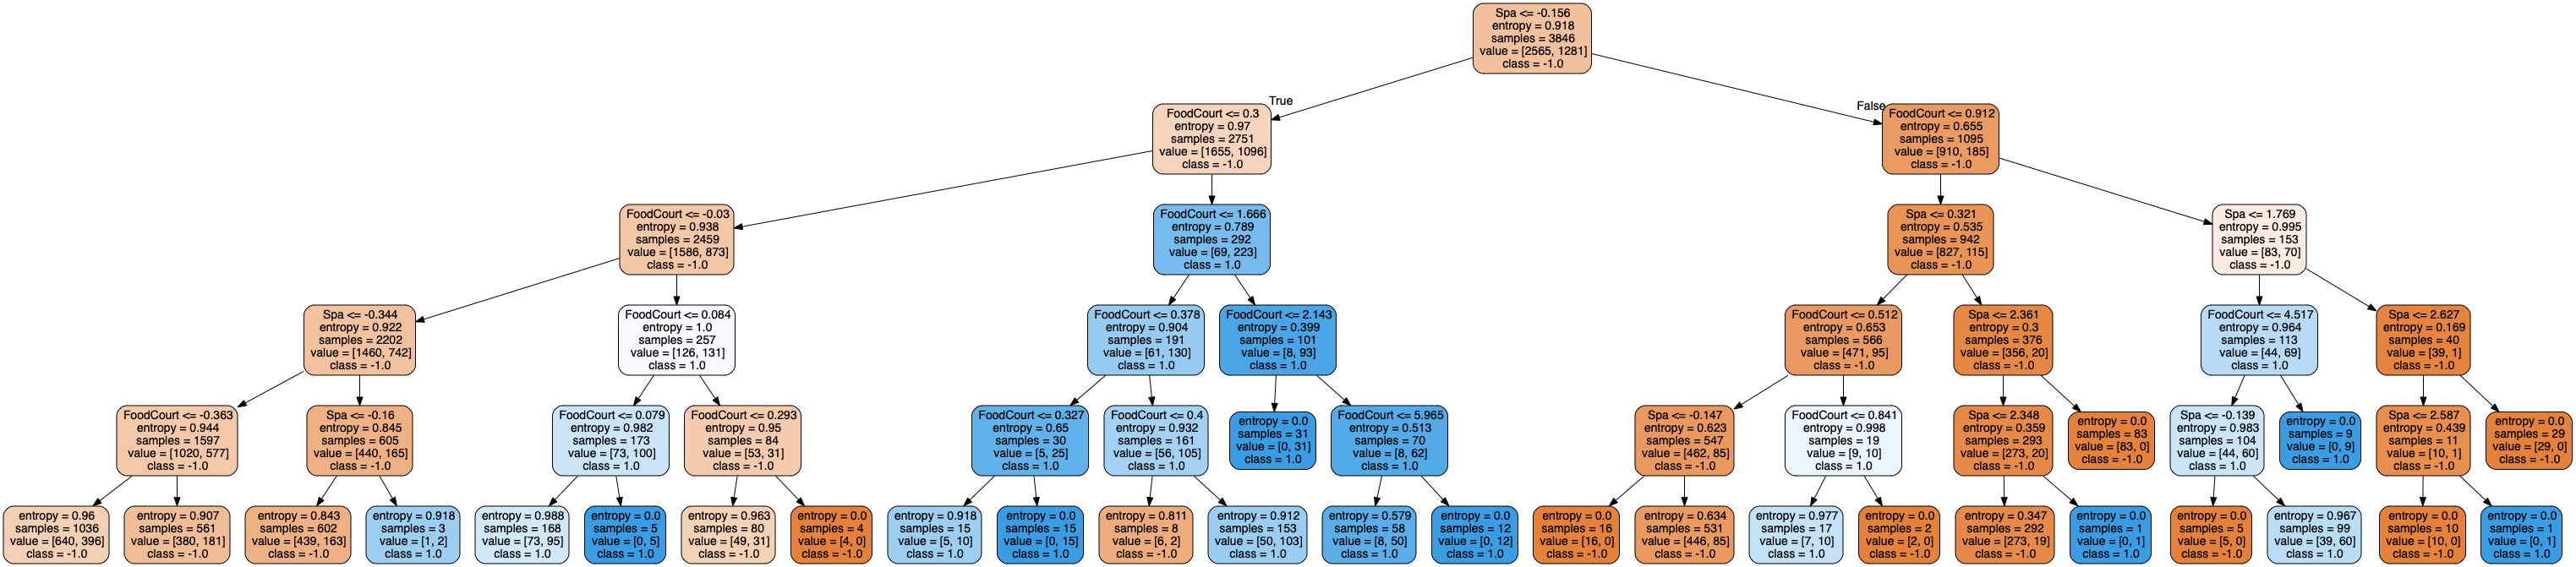

test size:  962 , total errors in test: 29.94%
index = predicted, columns = factual, in %:
         -1        1
-1  62.0582  24.7401
 1  5.19751  8.00416


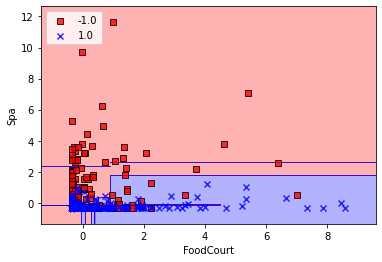

In [ ]:
ppn = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = 'Tree', criterion_tree = "entropy", depth = 5, random_state_sample = 1,random_state_ppn = 2, fraction = 0.8,plot = True, res = 0.01)

test size:  1442 , total errors in test: 31.00%
index = predicted, columns = factual, in %:
         -1        1
-1  64.8405  29.7503
 1  1.24827  4.16089
     w =  [-0.3393129   0.22611681 -0.20112972]


/Users/sergey/Dropbox/GitHub/spaceship/spaceship/ds.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr[i] = 0


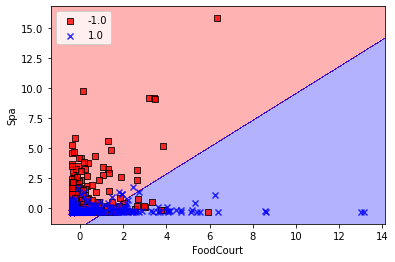

In [ ]:
ppn = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = 'Adaline', random_state_sample = 2,random_state_ppn = 3, fraction = 0.7, eta = 0.0001, iter = 150,plot = True, res = 0.01)

In [ ]:
for i in d1.index:
    d1.loc[i,'f1'] = sigmoid(z(ppn,d1.loc[i,col_s[0]],d1.loc[i,col_s[1]]))

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(new_indexer, value)
/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

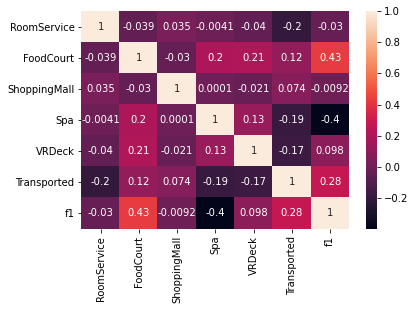

In [ ]:
corrMatrix = d1.corr()

sb.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
d1.head(20)

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,f1
0,0.0,0.0,0.0,0.0,0.0,-1.0,4.994716e-01
1,109.0,9.0,25.0,549.0,44.0,1.0,1.099302e-01
2,43.0,3576.0,0.0,6715.0,49.0,-1.0,4.785628e-07
3,0.0,1283.0,371.0,3329.0,193.0,-1.0,1.551699e-04
4,303.0,70.0,151.0,565.0,2.0,1.0,1.235222e-01
5,0.0,483.0,0.0,291.0,0.0,1.0,6.008253e-01
6,42.0,1539.0,3.0,0.0,0.0,1.0,9.924942e-01
7,0.0,0.0,0.0,0.0,0.0,1.0,4.994716e-01
8,0.0,785.0,17.0,216.0,0.0,1.0,8.398556e-01
11,39.0,7295.0,589.0,110.0,124.0,1.0,1.000000e+00


In [ ]:
ppn = ds.divide_frame(dataf = d1,columns = features+['f1'],teacher_column = "Transported",classifier = 'Tree', criterion_tree = "entropy", depth = 3, random_state_sample = 1,random_state_ppn = 2, fraction = 0.8,plot = False, res = 0.01)

ValueError: Length of feature_names, 7 does not match number of features, 8